In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import  Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
import keras
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as pip
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

In [13]:
mic_df=pd.read_csv("C:\\BIG DATA\\thesis\\12045261\\Myocardial infarction complications Database.csv")
mic_df
mic_df.loc[mic_df.LET_IS!=0,'LET_IS']=1 #To LET_IS einai multiclass. Ayti i grammi to kanei binary 0=zisane. 1=pethanane

In [14]:
#Οι στηλες IBS_NASL, KFK_BLOOD,ΚΑΘΩΣ ΚΑΙ ΟΙ ,S_AD_KBRIG,D_AD_KBRIG αποτελουνται σχεδον αποκλειστικα απο missing values και γινονται drop. Drop kanoume episis kai to id
mic_df.drop(["ID","IBS_NASL","KFK_BLOOD","S_AD_KBRIG","D_AD_KBRIG"],inplace=True,axis=1)
#mic_df.drop(["ID","IBS_NASL","KFK_BLOOD"],inplace=True,axis=1)
numeric_features=["AGE","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE","INF_ANAM","STENOK_AN","FK_STENOK","GB","DLIT_AG","TIME_B_S","R_AB_1_n","R_AB_2_n","R_AB_3_n","NA_R_1_n","NA_R_2_n","NA_R_3_n","NOT_NA_1_n","NOT_NA_2_n","NOT_NA_3_n"]


In [15]:
target_variable="LET_IS"
scenario=4
to_drop_list3=["R_AB_3_n","NA_R_3_n","NOT_NA_3_n"]
to_drop_list2=["R_AB_2_n","NA_R_2_n","NOT_NA_2_n"]
to_drop_list1=["R_AB_1_n","NA_R_1_n","NOT_NA_1_n"]
to_drop_list2.extend(to_drop_list3)
to_drop_list1.extend(to_drop_list2)


In [16]:
y=mic_df[target_variable]
if scenario==5:
    x = mic_df.drop([target_variable], axis=1)
elif scenario==4:
    x = mic_df.loc[: ,"AGE":"TRENT_S_n"]
elif scenario==3:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list3, axis=1)
elif scenario==2:
    df3 =  mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list2, axis=1)
elif scenario==1:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list1, axis=1)
x


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [17]:
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
l1=x.columns.values.tolist()#Παιρνω τα ονοματα ολων των στηλων σε λιστα

categorical_features = [x for x in l1 if x not in numeric_features]#Απο την παραπανω λιστα αφαιρω τα ονοματα ΤΩΝ CONTINUOUS FEATURES

categorical_transformer =Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)      
    ]
)


# Define Pipelines

In [18]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("XGboost", XGBClassifier(use_label_encoder=False))])

In [19]:
#PCA ME PIPELINE!
'''pca = PCA()
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("pca",pca)])
pipe1.fit(x)
pca_data = pipe1.transform(x)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


#Ο παρακατω κωδικα μας δινει αθροιστικη διακυμανση ανα πληθος principal components
plt.figure( figsize = (10,8))
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', alpha=0.4)
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")'''

'pca = PCA()\npipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("pca",pca)])\npipe1.fit(x)\npca_data = pipe1.transform(x)\n\nper_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)\nlabels = [\'PC\' + str(x) for x in range(1, len(per_var)+1)]\nplt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)\nplt.ylabel(\'Percentage of Explained Variance\')\nplt.xlabel(\'Principal Component\')\nplt.title(\'Scree Plot\')\nplt.show()\n\n\n#Ο παρακατω κωδικα μας δινει αθροιστικη διακυμανση ανα πληθος principal components\nplt.figure( figsize = (10,8))\nplt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = \'o\', linestyle = \'--\', alpha=0.4)\nplt.title("Explained Variance by Components")\nplt.xlabel("Number of Components")\nplt.ylabel("Cumulative Explained Variance")'

In [20]:
#Pipelines me PCA
'''pipe1 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("XGboost", XGBClassifier(use_label_encoder=False))])'''

'pipe1 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("SVM", SVC(kernel=\'linear\'))])\npipe2 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Random Forest", RandomForestClassifier(random_state=1234))])\npipe3 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])\npipe4 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Logistic Regression", LogisticRegression(solver=\'liblinear\',random_state=1234,max_iter=10000))])\npipe5 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("AdaBoost", AdaBoostClassifier( random_state=1234))])\npipe6 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])\npipe7 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(20)), ("XGboost", XGBClassifier(use_label_encoder=False))])'

In [21]:
#Looking for correlations... No important correlations found!
'''for col in numeric_features:
        mic_df[col].fillna(value=mic_df[col].mean(),inplace=True)
        
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
mic_df=mic_df.fillna(mic_df.mode().iloc[0])


#min-max scaler
#X_train_norm=X_train.copy()
#X_test_norm=X_test.copy()
for c in numeric_features:
    norm=MinMaxScaler().fit(mic_df[[c]])    
    mic_df[c]=norm.transform(mic_df[[c]])
    mic_df[c]=norm.transform(mic_df[[c]])


cor=mic_df.corr()
cor_target = abs(cor[target_variable])
relevant_features = cor_target[cor_target>0.3]
relevant_features'''

'for col in numeric_features:\n        mic_df[col].fillna(value=mic_df[col].mean(),inplace=True)\n        \n#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες\nmic_df=mic_df.fillna(mic_df.mode().iloc[0])\n\n\n#min-max scaler\n#X_train_norm=X_train.copy()\n#X_test_norm=X_test.copy()\nfor c in numeric_features:\n    norm=MinMaxScaler().fit(mic_df[[c]])    \n    mic_df[c]=norm.transform(mic_df[[c]])\n    mic_df[c]=norm.transform(mic_df[[c]])\n\n\ncor=mic_df.corr()\ncor_target = abs(cor[target_variable])\nrelevant_features = cor_target[cor_target>0.3]\nrelevant_features'

# Simple Cross Validation

In [22]:
pipes=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']    
    
    # define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for pipe,name in zip(pipes,names):
    scores=cross_validate(pipe,x,y,cv=cv,scoring=scoring )
    print(name)
    print("accuracy=%.3f" % scores["test_accuracy"].mean())
    print("precision=%.3f" % scores["test_precision"].mean())
    print("recall=%.3f" % scores["test_recall"].mean())
    print("f1=%.3f" % scores["test_f1"].mean())

SVM
accuracy=0.875
precision=0.677
recall=0.424
f1=0.517
Random Forest
accuracy=0.913
precision=0.979
recall=0.464
f1=0.624
Decision Tree
accuracy=0.860
precision=0.557
recall=0.592
f1=0.571
Logistic Regression
accuracy=0.873
precision=0.657
recall=0.440
f1=0.521
AdaBoost
accuracy=0.913
precision=0.808
recall=0.607
f1=0.689
Gradient Boosting
accuracy=0.917
precision=0.863
recall=0.576
f1=0.685
[11:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

# HYPERPARAMETER TUNING WITH GRISEARCHCV

## Define param grids

In [26]:
svm_c_range=np.arange(0.01,0.2,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(2,10)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(2,8)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.1,0.5,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(30,200,10)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.05,0.15,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}#,"XGboost__max_depth":max_depth_range,"XGboost__learning_rate":grad_boost_lrate,"XGboost__n_estimators":estimators}

In [24]:
def evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7):
#Me tin parakatw grammi orizeis 1 metriki tin opoia de mporeis na oriseis xerata opws tis upoloipes kathws den anikei stis dunates times tou scoring
#scoring = {'acc': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1',"matt":make_scorer(matthews_corrcoef)}
    scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid
    for pgrid, est in zip((param_grid1, param_grid2,
                                param_grid3, param_grid4, param_grid5,param_grid6,param_grid7),
                                (pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)):  
        
        # define grid search
        grid = GridSearchCV(estimator=est, param_grid=pgrid, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy")
        # execute the grid search
        grid_result = grid.fit(x, y)
        # report the best configuration
        #print(c["name"])
        print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
        
        # report all configurations
        for scorer in zip(sorted(scoring)):
            print(scorer)
            means = grid_result.cv_results_['mean_test_%s' % scorer]
            stds = grid_result.cv_results_['std_test_%s' % scorer]
            params = grid_result.cv_results_['params']

            for mean, stdev, param in zip(means, stds, params):
                
                print('%f (%f) with: %r' % (mean, stdev, param))

In [ ]:
'''pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("scaler", StandardScaler()),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe8 = Pipeline(steps=[("preprocessor", preprocessor), ('selector', VarianceThreshold(.05)),("XGboost", XGBClassifier(use_label_encoder=False))])'''

In [27]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.879020 using {'SVM__C': 0.17}
('accuracy',)
0.867059 (0.016117) with: {'SVM__C': 0.01}
0.871961 (0.020302) with: {'SVM__C': 0.02}
0.873922 (0.020472) with: {'SVM__C': 0.03}
0.873725 (0.022411) with: {'SVM__C': 0.04}
0.875686 (0.022565) with: {'SVM__C': 0.05}
0.876667 (0.024560) with: {'SVM__C': 0.060000000000000005}
0.877451 (0.025824) with: {'SVM__C': 0.06999999999999999}
0.877451 (0.025824) with: {'SVM__C': 0.08}
0.876863 (0.025593) with: {'SVM__C': 0.09}
0.877843 (0.025080) with: {'SVM__C': 0.09999999999999999}
0.877647 (0.023938) with: {'SVM__C': 0.11}
0.877647 (0.024225) with: {'SVM__C': 0.12}
0.877647 (0.024790) with: {'SVM__C': 0.13}
0.878235 (0.024638) with: {'SVM__C': 0.14}
0.878431 (0.024647) with: {'SVM__C': 0.15000000000000002}
0.878627 (0.023893) with: {'SVM__C': 0.16}
0.879020 (0.023317) with: {'SVM__C': 0.17}
0.877843 (0.023317) with: {'SVM__C': 0.18000000000000002}
0.876275 (0.023108) with: {'SVM__C': 0.19}
('f1',)
0.320925 (0.119600) with: {'SVM__C': 0.01}
0.38

# BEST MODELS RE-EVALUATION WITH CV

In [28]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SVM", SVC(kernel='linear',C=0.17))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestClassifier(max_depth=8, random_state=1234,class_weight='balanced_subsample'))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("Decision Tree", DecisionTreeClassifier(max_depth=2,random_state=1234,max_leaf_nodes=3))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("Logistic Regression", LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.35))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("AdaBoost", AdaBoostClassifier(n_estimators=40, random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("Gradient Boosting", GradientBoostingClassifier(n_estimators=180, learning_rate=0.09, random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("XGboost", XGBClassifier(use_label_encoder=False))])

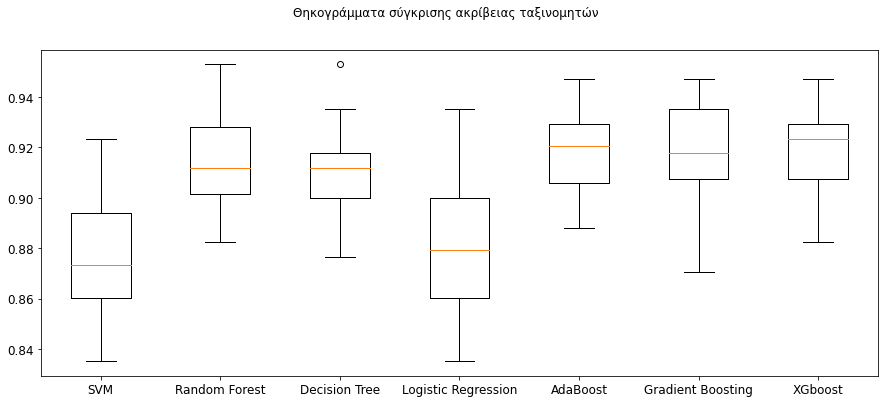

In [29]:
models = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
results=[]
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']
#models.append(pipe1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for model in models:
    cv_results = cross_val_score(model, x, y, cv=cv,n_jobs=-1)
    results.append(cv_results)
#names.append(name)
fig = plt.figure(figsize=(15,6))
fig.suptitle('Θηκογράμματα σύγκρισης ακρίβειας ταξινομητών')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()  

# Voting Classifier

In [33]:
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}
vc = VotingClassifier([('clf1', pipe7), ('clf2', pipe6), ('clf3', pipe5)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(vc, params, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy")
grid_result =grid.fit(x, y)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
        
        # report all configurations
for scorer in zip(sorted(scoring)):
    print(scorer)
    means = grid_result.cv_results_['mean_test_%s' % scorer]
    stds = grid_result.cv_results_['std_test_%s' % scorer]
    params = grid_result.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        
        print('%f (%f) with: %r' % (mean, stdev, param))

[20:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.922353 using {'voting': 'hard', 'weights': (1, 2, 1)}
('accuracy',)
0.921765 (0.014097) with: {'voting': 'hard', 'weights': (1, 1, 1)}
0.921373 (0.014996) with: {'voting': 'hard', 'weights': (2, 1, 1)}
0.922353 (0.016457) with: {'voting': 'hard', 'weights': (1, 2, 1)}
0.918235 (0.013358) with: {'voting': 'hard', 'weights': (1, 1, 2)}
0.920196 (0.019253) with: {'voting': 'soft', 'weights': (1, 1, 1)}
0.920784 (0.018523) with: {'voting': 'soft', 'weights': (2, 1, 1)}
0.920784 (0.018954) with: {'voting': 'soft', 'weights': (1, 2, 1)}
0.919804 (0.018999) with: {'voting': 'soft', 'weights': (1, 1, 2)}
('f1',)
0.705677 (0.062607) with: {'voting': 'hard', 'weights': (1, 1, 1)}
0.6

# TOMEK LINKS

In [34]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("XGboost", XGBClassifier(use_label_encoder=False))])

In [35]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.880196 using {'SVM__C': 0.09999999999999999}
('accuracy',)
0.868039 (0.016685) with: {'SVM__C': 0.01}
0.872941 (0.019663) with: {'SVM__C': 0.02}
0.875686 (0.022205) with: {'SVM__C': 0.03}
0.877451 (0.022685) with: {'SVM__C': 0.04}
0.878431 (0.023595) with: {'SVM__C': 0.05}
0.879216 (0.025357) with: {'SVM__C': 0.060000000000000005}
0.879216 (0.025629) with: {'SVM__C': 0.06999999999999999}
0.879804 (0.025264) with: {'SVM__C': 0.08}
0.879608 (0.025986) with: {'SVM__C': 0.09}
0.880196 (0.025707) with: {'SVM__C': 0.09999999999999999}
0.879412 (0.025449) with: {'SVM__C': 0.11}
0.878824 (0.025578) with: {'SVM__C': 0.12}
0.878039 (0.025092) with: {'SVM__C': 0.13}
0.877843 (0.025034) with: {'SVM__C': 0.14}
0.878039 (0.025092) with: {'SVM__C': 0.15000000000000002}
0.876863 (0.024675) with: {'SVM__C': 0.16}
0.876863 (0.024815) with: {'SVM__C': 0.17}
0.875490 (0.025282) with: {'SVM__C': 0.18000000000000002}
0.875098 (0.025716) with: {'SVM__C': 0.19}
('f1',)
0.333805 (0.122682) with: {'SVM_

# GRIDSEARCH PARAMETERS FOR PROBABILITY CALIBRATION

In [ ]:
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']
models = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
for model,name in zip(models,names):
    calibrated = CalibratedClassifierCV(model)
    # define grid
    param_grid = dict(cv=[2,3,4,5], method=['sigmoid','isotonic'])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid search
    grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy",return_train_score=True)
    grid_result = grid.fit(x, y)
    # report the best configuration
    print(name)
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    for scorer in zip(sorted(scoring)):
        print(scorer)
        means = grid_result.cv_results_['mean_test_%s' % scorer]
        stds = grid_result.cv_results_['std_test_%s' % scorer]
        params = grid_result.cv_results_['params']
        for mean, stdev, param in zip(means, stds, params):
            print('%f (%f) with: %r' % (mean, stdev, param))

# TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

## Missing value imputation + min-max scaler on train-test split

In [ ]:
#Αντικατασταση missing values με mean στηλης για στηλες με συνεχεις τιμες
for col in numeric_features:
        X_train[col].fillna(value=X_train[col].mean(),inplace=True)
        X_test[col].fillna(value=X_test[col].mean(),inplace=True)
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
X_train=X_train.fillna(X_train.mode().iloc[0])
X_test=X_test.fillna(X_test.mode().iloc[0])

#min-max scaler
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()
for c in numeric_features:
    norm=MinMaxScaler().fit(X_train_norm[[c]])    
    X_train_norm[c]=norm.transform(X_train_norm[[c]])
    X_test_norm[c]=norm.transform(X_test_norm[[c]])

# RELIABILITY CURVES

In [ ]:
 
# predict calibrated probabilities
def calibrated(X_train_norm, X_test_norm, y_train):
	# define model
	model = RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced_subsample')
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
	calibrated.fit(X_train_norm, y_train)
	# predict probabilities
	return calibrated.predict_proba(X_test_norm)[:, 1]
 

yhat_calibrated = calibrated(X_train_norm, X_test_norm, y_train)

fop_calibrated, mpv_calibrated = calibration_curve(y_test, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.plot(mpv_calibrated, fop_calibrated, marker='.')
plt.title("Καμπύλη αξιοπιστίας")
plt.xlabel("Mέση προβλεφθείσα πιθανότητα")
plt.ylabel("Σχετική συχνότητα κλάσης 1")
plt.legend(["Perfect Calibration","Random Forest"])
plt.show()

In [ ]:
 
# predict calibrated probabilities
def calibrated(X_train_norm, X_test_norm, y_train):
	# define model
	model = XGBClassifier(use_label_encoder=False)
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
	calibrated.fit(X_train_norm, y_train)
	# predict probabilities
	return calibrated.predict_proba(X_test_norm)[:, 1]
 

yhat_calibrated = calibrated(X_train_norm, X_test_norm, y_train)

fop_calibrated, mpv_calibrated = calibration_curve(y_test, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.plot(mpv_calibrated, fop_calibrated, marker='.')
plt.title("Καμπύλη αξιοπιστίας")
plt.xlabel("Mέση προβλεφθείσα πιθανότητα")
plt.ylabel("Σχετική συχνότητα κλάσης 1")
plt.legend(["Perfect Calibration","XGBoost"])
plt.show()

# Holdout Set Evaluation + ROC + P-R CURVES

In [ ]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.16,probability=True)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=4,random_state=1234,max_leaf_nodes=4)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.35)
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=100, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=150, learning_rate=0.14, random_state=1234)
    },
    {
        "name": "XGboost",
        "classifier": XGBClassifier(use_label_encoder=False)
    }
    ] 

In [ ]:
fig = plt.figure(figsize=(10,6))  # a new figure window
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ROC curve')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.grid(True)


fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Precision-Recall curve')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')


for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

    yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
    yhat = yhat[:, 1]

#plot roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
    ax.plot(fpr, tpr,label=c["name"]+", AUC=%.3f" % auc(fpr, tpr))
    ax.legend()

#plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    ax2.plot(recall, precision, marker='.', label=c["name"]+", AUC=%.3f" % auc(recall, precision))
    ax2.legend()

#finally print Area Under the Curve of each precision-recall curve
    print("AUC=%.3f" % auc(recall, precision))        

# SMOTE-OVERSAMPLING

In [ ]:
svm_c_range=np.arange(0.2,0.41,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(4,14)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(3,12)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.1,0.5,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(50,200,10)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.05,0.21,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [ ]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("XGboost", XGBClassifier(use_label_encoder=False))])

In [ ]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

# RandomOverSampling

In [ ]:
svm_c_range=np.arange(0.1,0.2,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(4,10)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(3,10)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.4,1,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(300,600,50)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.05,0.21,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [ ]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("XGboost", XGBClassifier(use_label_encoder=False))])

In [ ]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)